Pitch, duration in beats, hold last note


We divide up the the piece to discrete time segments, and each time segment, we check 

(Tempo is a pre-determined constant)


Every timestep (probably 8th notes), we have:
- Each timestep = vector of ~130 floats
- A pitch (or rest or hold) --- (We could do relative pitch, but lets put that off until later)

"One Hot Encoding" - We've got a discrete variable, so we want to break them up into a sequence of probabilities



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

import music21 as m21

In [201]:
song = m21.converter.parse('data/bach-chorales/bach-1.mid')
song.analyze('key')
# song.show('midi')

song.measures(0, 1)

<music21.stream.Score 0x7fbc524e9198>

In [190]:
song.show('text')


{0.0} <music21.stream.Part 0x7fbc521a3780>
    {0.0} <music21.tempo.MetronomeMark animato Quarter=120.0>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.stream.Voice 0x7fbc53e20908>
        {0.0} <music21.chord.Chord D3 A3 F#4 D5>
        {2.0} <music21.chord.Chord F#3 D4 A4 A4>
        {4.0} <music21.chord.Chord G#3 B4>
        {5.0} <music21.chord.Chord F#3 C#5>
        {6.0} <music21.chord.Chord E3 G#3>
        {7.0} <music21.chord.Chord F#3 A3>
        {8.0} <music21.chord.Chord G#3 B3 E4 D5>
        {10.0} <music21.chord.Chord A3 C#5>
        {12.0} <music21.chord.Chord B-3 C#4 F#4 C#5>
        {14.0} <music21.note.Note B>
        {15.0} <music21.note.Note F#>
        {16.0} <music21.note.Note G>
        {17.0} <music21.chord.Chord D3 F#4>
        {18.0} <music21.chord.Chord E3 G4 B4>
        {20.0} <music21.chord.Chord F#3 B-4>
        {22.0} <music21.chord.Chord B2 D4 F#4 B4>
        {24.0} <music21.chord.Chord B3 D4 F#4 B4>
        {26.0} <music21.chord.Chord B3 

In [5]:
m21.environment.set("musescoreDirectPNGPath", "/usr/bin/mscore")
#music21.environment.set("musescoreDirectPNGPath", "/bin/echo")

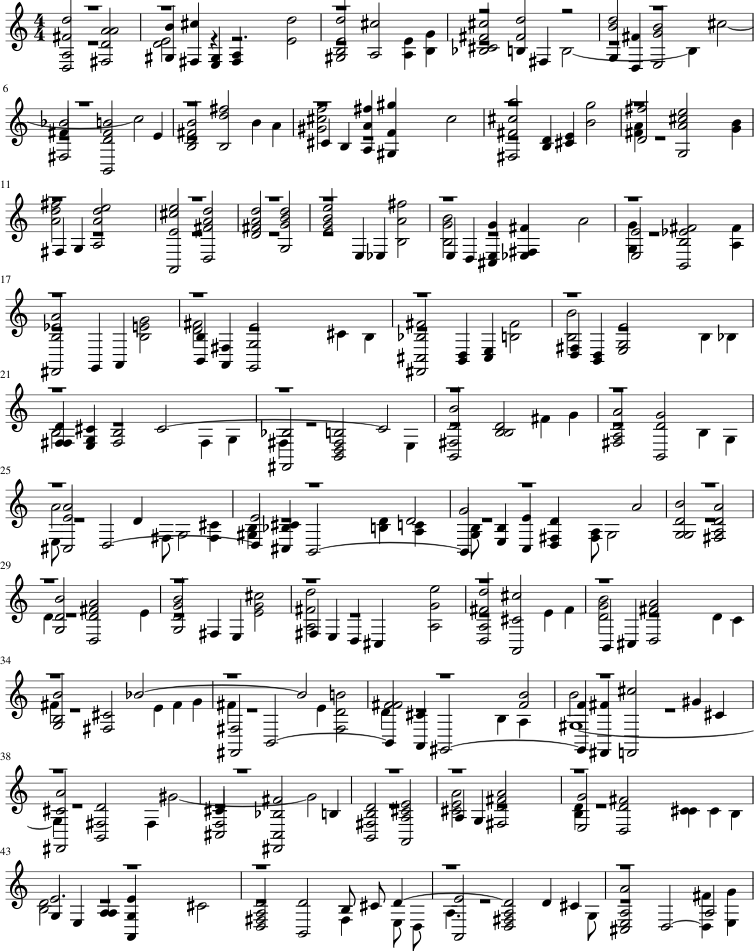

In [191]:
song.show()

In [25]:
song.pitches

[<music21.pitch.Pitch D3>,
 <music21.pitch.Pitch A3>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch D5>,
 <music21.pitch.Pitch F#3>,
 <music21.pitch.Pitch D4>,
 <music21.pitch.Pitch A4>,
 <music21.pitch.Pitch A4>,
 <music21.pitch.Pitch G#3>,
 <music21.pitch.Pitch B4>,
 <music21.pitch.Pitch F#3>,
 <music21.pitch.Pitch C#5>,
 <music21.pitch.Pitch E3>,
 <music21.pitch.Pitch G#3>,
 <music21.pitch.Pitch F#3>,
 <music21.pitch.Pitch A3>,
 <music21.pitch.Pitch G#3>,
 <music21.pitch.Pitch B3>,
 <music21.pitch.Pitch E4>,
 <music21.pitch.Pitch D5>,
 <music21.pitch.Pitch A3>,
 <music21.pitch.Pitch C#5>,
 <music21.pitch.Pitch B-3>,
 <music21.pitch.Pitch C#4>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch C#5>,
 <music21.pitch.Pitch B3>,
 <music21.pitch.Pitch F#3>,
 <music21.pitch.Pitch G3>,
 <music21.pitch.Pitch D3>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch E3>,
 <music21.pitch.Pitch G4>,
 <music21.pitch.Pitch B4>,
 <music21.pitch.Pitch F#3>,
 <music21.pitch.Pitch B-4>,
 <music21.p

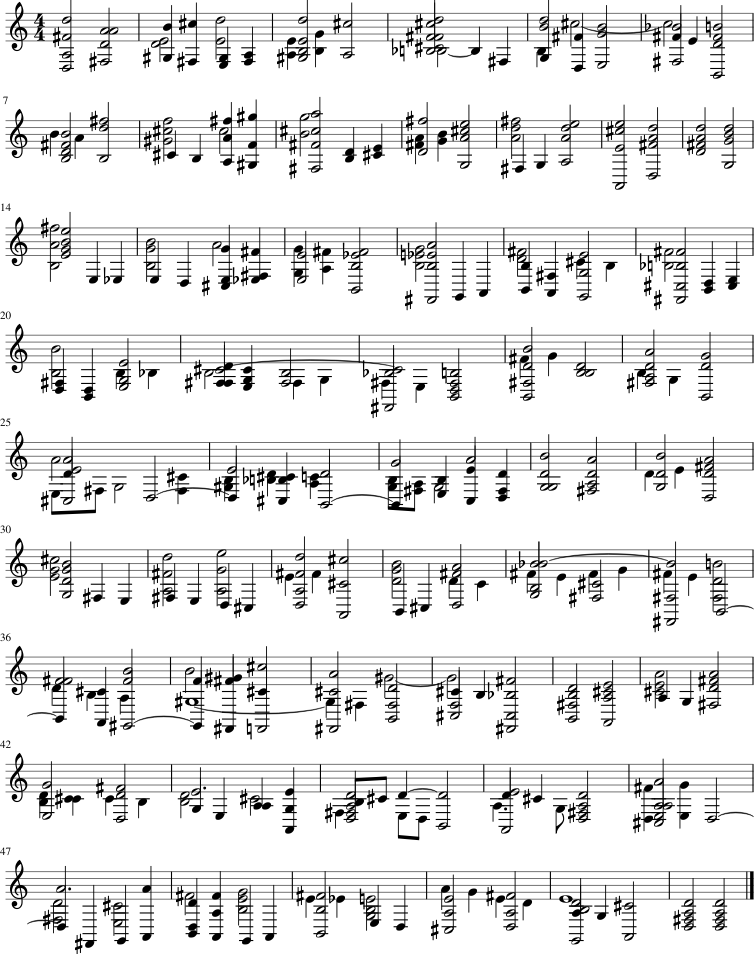

In [110]:
import copy
restless = copy.deepcopy(song)
rests = restless.recurse().getElementsByClass('Rest')
restless.remove(list(rests), recurse=True)
restless.show()
#.implode() might be useful

In [26]:
song.analyze('ambitus')

<music21.interval.Interval M24>

In [27]:
song.

<music21.duration.Duration 208.0>

In [7]:
dir(song)

['_DOC_ATTR',
 '_DOC_ORDER',
 '__add__',
 '__bool__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatedSeconds',
 '_activeSite',
 '_activeSiteStoredOffset',
 '_addElementPreProcess',
 '_adjacencySearch',
 '_appendCore',
 '_atSoundingPitch',
 '_cache',
 '_classListCacheDict',
 '_classListFullyQualifiedCacheDict',
 '_classSetCacheDict',
 '_consolidateLayering',
 '_deepcopySubclassable',
 '_derivation',
 '_durSpanOverlap',
 '_duration',
 '_elements',
 '_endElements',
 '_findLayering',
 '_fixMeasureNumbers',
 '_getActiveSite',
 '_getAtSoundingPitch',
 '_getClef

In [10]:
ns = list(song.notes)

In [30]:
song.show('text')

{0.0} <music21.stream.Part 0x7f8e04c05048>
    {0.0} <music21.tempo.MetronomeMark animato Quarter=120.0>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.stream.Voice 0x7f8e046c1438>
        {0.0} <music21.chord.Chord D3 A3 F#4 D5>
        {2.0} <music21.chord.Chord F#3 D4 A4 A4>
        {4.0} <music21.chord.Chord G#3 B4>
        {5.0} <music21.chord.Chord F#3 C#5>
        {6.0} <music21.chord.Chord E3 G#3>
        {7.0} <music21.chord.Chord F#3 A3>
        {8.0} <music21.chord.Chord G#3 B3 E4 D5>
        {10.0} <music21.chord.Chord A3 C#5>
        {12.0} <music21.chord.Chord B-3 C#4 F#4 C#5>
        {14.0} <music21.note.Note B>
        {15.0} <music21.note.Note F#>
        {16.0} <music21.note.Note G>
        {17.0} <music21.chord.Chord D3 F#4>
        {18.0} <music21.chord.Chord E3 G4 B4>
        {20.0} <music21.chord.Chord F#3 B-4>
        {22.0} <music21.chord.Chord B2 D4 F#4 B4>
        {24.0} <music21.chord.Chord B3 D4 F#4 B4>
        {26.0} <music21.chord.Chord B3 

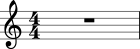

In [41]:
song[0][3][0].show()

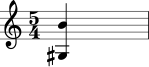

In [52]:
secondmeasurehalf = song[0][2].getElementsByOffset(4)
secondmeasurehalf.show()

In [55]:
sBach = m21.corpus.parse('bach/bwv57.8')

In [57]:
sBach.show('text')

{0.0} <music21.metadata.Metadata object at 0x7f8e042a1358>
{0.0} <music21.stream.Part Soprano>
    {0.0} <music21.instrument.Instrument P1: Soprano: Instrument 1>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of B- major>
        {0.0} <music21.meter.TimeSignature 3/4>
        {0.0} <music21.note.Note B->
        {1.0} <music21.note.Note B->
        {2.0} <music21.note.Note F>
    {3.0} <music21.stream.Measure 2 offset=3.0>
        {0.0} <music21.note.Note D>
        {1.5} <music21.note.Note C>
        {2.0} <music21.note.Note B->
    {6.0} <music21.stream.Measure 3 offset=6.0>
        {0.0} <music21.note.Note A>
        {1.0} <music21.note.Note B->
        {1.5} <music21.note.Note A>
        {2.0} <music21.note.Note G>
        {2.5} <music21.note.Note F>
    {9.0} <music21.stream.Measure 4 offset=9.0>
        {0.0} <music21.note.Note B->
        {1.0} <music21.note.Note C>
        {2.0} <music21.note.Note D>
    

In [68]:
list(song.recurse().voices)

[<music21.stream.Voice 0x7f8e046c1438>,
 <music21.stream.Voice 0x7f8e04604470>,
 <music21.stream.Voice 0x7f8e0455ad68>,
 <music21.stream.Voice 0x7f8e045751d0>]

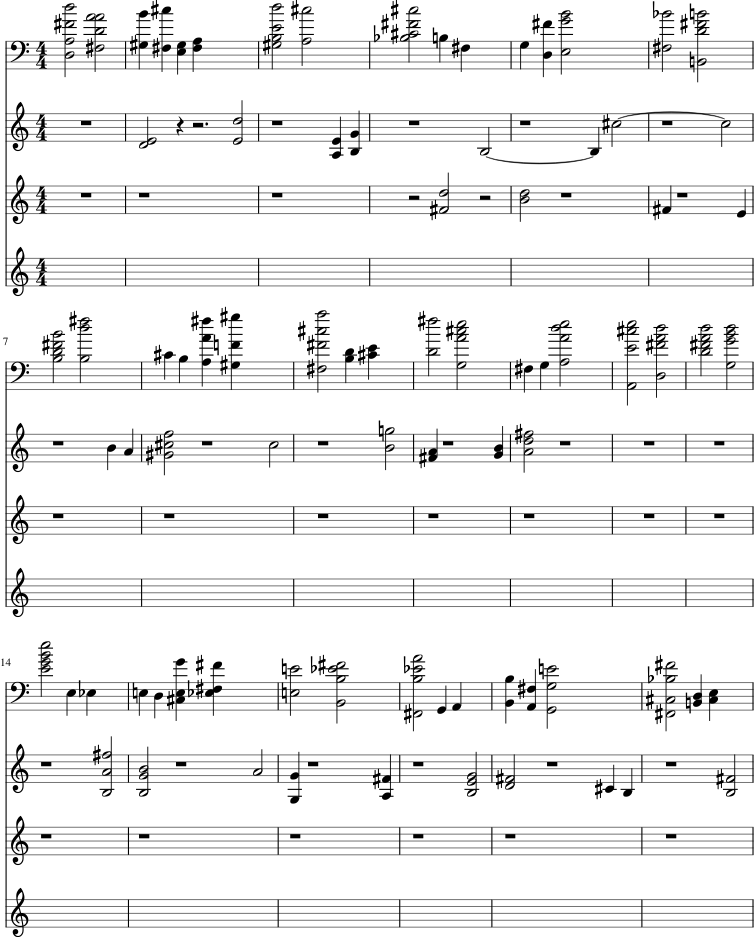

In [69]:
separated = song.voicesToParts()
separated.show()

In [86]:
separated.parts[1].show('text')

{0.0} <music21.note.Rest rest>
{4.0} <music21.chord.Chord D4 E4>
{4.0} <music21.note.Rest rest>
{5.0} <music21.note.Rest rest>
{6.0} <music21.chord.Chord E4 D5>
{10.0} <music21.chord.Chord A3 E4>
{11.0} <music21.chord.Chord B3 G4>
{14.0} <music21.note.Note B>
{18.0} <music21.note.Note C#>
{26.0} <music21.note.Note B>
{27.0} <music21.note.Note A>
{28.0} <music21.chord.Chord G#4 C#5 F5>
{30.0} <music21.note.Note C#>
{34.0} <music21.chord.Chord B4 G5>
{36.0} <music21.chord.Chord F#4 A4>
{37.0} <music21.chord.Chord G4 B4>
{40.0} <music21.chord.Chord A4 D5 F#5>
{54.0} <music21.chord.Chord B3 A4 F#5>
{56.0} <music21.chord.Chord B3 G4 B4>
{58.0} <music21.note.Note A>
{60.0} <music21.chord.Chord G3 G4>
{61.0} <music21.chord.Chord A3 F#4>
{66.0} <music21.chord.Chord B3 E4 G4>
{68.0} <music21.chord.Chord D4 F#4>
{70.0} <music21.note.Note C#>
{71.0} <music21.note.Note B>
{74.0} <music21.chord.Chord B3 F#4>
{76.0} <music21.chord.Chord B3 B4>
{78.0} <music21.note.Note B>
{79.0} <music21.note.Note B

In [82]:
notes =  song.flat.notes.getElementsByClass('Note').pitches
list(notes)

[<music21.pitch.Pitch B3>,
 <music21.pitch.Pitch B3>,
 <music21.pitch.Pitch F#3>,
 <music21.pitch.Pitch G3>,
 <music21.pitch.Pitch C#5>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch E4>,
 <music21.pitch.Pitch B4>,
 <music21.pitch.Pitch A4>,
 <music21.pitch.Pitch C#4>,
 <music21.pitch.Pitch B3>,
 <music21.pitch.Pitch C#5>,
 <music21.pitch.Pitch F#3>,
 <music21.pitch.Pitch G3>,
 <music21.pitch.Pitch E3>,
 <music21.pitch.Pitch E-3>,
 <music21.pitch.Pitch E3>,
 <music21.pitch.Pitch D3>,
 <music21.pitch.Pitch A4>,
 <music21.pitch.Pitch G2>,
 <music21.pitch.Pitch A2>,
 <music21.pitch.Pitch C#4>,
 <music21.pitch.Pitch B3>,
 <music21.pitch.Pitch B3>,
 <music21.pitch.Pitch B-3>,
 <music21.pitch.Pitch B3>,
 <music21.pitch.Pitch F#3>,
 <music21.pitch.Pitch C#4>,
 <music21.pitch.Pitch G3>,
 <music21.pitch.Pitch F#3>,
 <music21.pitch.Pitch E3>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch G4>,
 <music21.pitch.Pitch B3>,
 <music21.pitch.Pitch G3>,
 <music21.pitch.Pitch E3>,
 <music21.pitch

In [41]:
list(song.flat)

[<music21.tempo.MetronomeMark animato Quarter=120.0>,
 <music21.meter.TimeSignature 4/4>,
 <music21.chord.Chord D3 A3 F#4 D5>,
 <music21.note.Rest rest>,
 <music21.note.Rest rest>,
 <music21.chord.Chord F#3 D4 A4 A4>,
 <music21.chord.Chord G#3 B4>,
 <music21.chord.Chord D4 E4>,
 <music21.note.Rest rest>,
 <music21.chord.Chord F#3 C#5>,
 <music21.note.Rest rest>,
 <music21.chord.Chord E3 G#3>,
 <music21.chord.Chord E4 D5>,
 <music21.chord.Chord F#3 A3>,
 <music21.chord.Chord G#3 B3 E4 D5>,
 <music21.chord.Chord A3 C#5>,
 <music21.chord.Chord A3 E4>,
 <music21.chord.Chord B3 G4>,
 <music21.chord.Chord B-3 C#4 F#4 C#5>,
 <music21.note.Note B>,
 <music21.note.Note B>,
 <music21.chord.Chord F#4 D5>,
 <music21.note.Rest rest>,
 <music21.note.Note F#>,
 <music21.note.Note G>,
 <music21.chord.Chord B4 D5>,
 <music21.chord.Chord D3 F#4>,
 <music21.chord.Chord E3 G4 B4>,
 <music21.note.Note C#>,
 <music21.chord.Chord F#3 B-4>,
 <music21.note.Note F#>,
 <music21.note.Note E>,
 <music21.chord.Chor

In [24]:
s1 = m21.stream.Stream()
s1.append(m21.note.Note('C4',type='half'))
s1.append(m21.note.Note('D4',type='quarter'))
s1[1].offset=1.75
s1.show('text')

{0.0} <music21.note.Note C>
{1.75} <music21.note.Note D>


In [31]:
s1.getElementsByOffset(2.75,mustBeginInSpan=False).show('text')

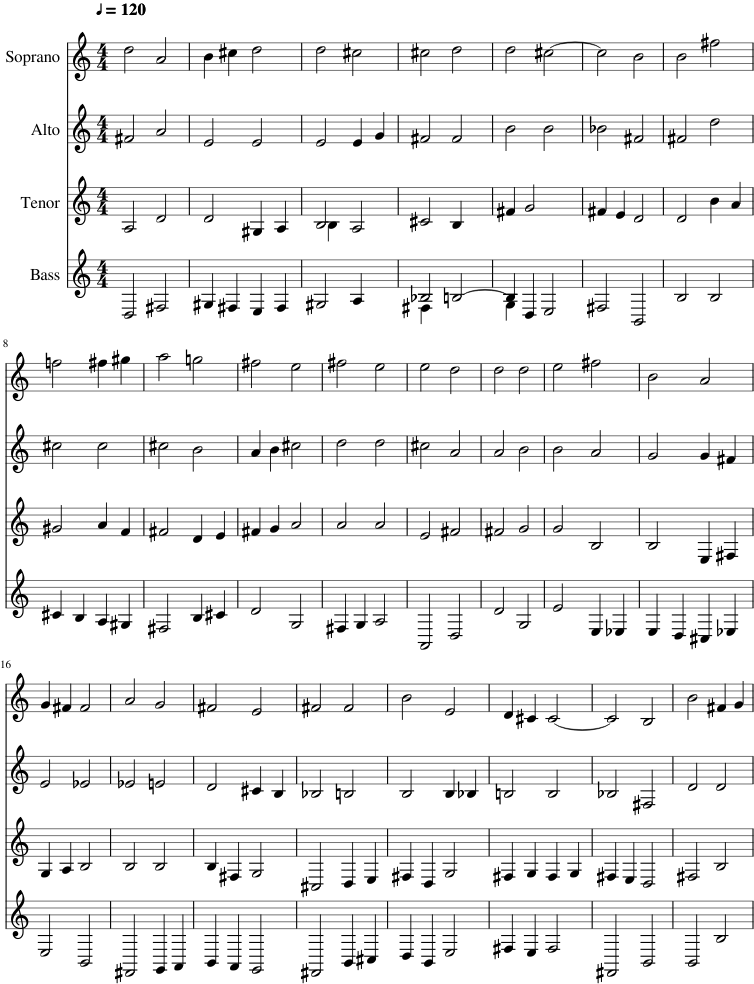

In [269]:
def separateVoices(song):
    timeSig = song.recurse().getElementsByClass('TimeSignature')[0]
    tempo = song.recurse().getElementsByClass('MetronomeMark')[0]

    sepVoices = m21.stream.Score()

    parts = []
    for voice in ['Soprano','Alto','Tenor','Bass']:
        part = m21.stream.Part()
        part.partName = voice
        part.append(timeSig)
        part.append(tempo)
        #part.append(m21.clef.TrebleClef() #just for readability
        parts.append(part)

    sepVoices.append(parts)

    # takes Chord, returns list of component Notes
    def chord2notes(chord):
        return [m21.note.Note(pitch, duration=chord.duration) for pitch in chord.pitches]

    # Replace chords with notes
    def removeChords(stream):
        import copy
        newStream = copy.deepcopy(stream)
        for noteOrChord in newStream.flat.notes:
            if noteOrChord.isChord:
                offset = noteOrChord.offset
                newStream.remove(noteOrChord, recurse=True)   

                for note in chord2notes(noteOrChord):
                    newStream.insert(offset,note)
        return newStream

    #Remove all chords
    chordless = removeChords(song)

    # At each note, identify and separate the voices
    for note in chordless.flat.notes:
#     for note in chordless.flat.getElementsByOffset(0,11, classList=['Note']):
        simulNotes = list(chordless.flat.getElementsByOffset(note.offset, mustBeginInSpan=False, classList=['Note']))
        simulNotes.sort(key=lambda x: x.pitch, reverse=True)
        

        for part, newnote in zip(parts, simulNotes):                
            if newnote.id not in [n.id for n in part.flat.notes] and note==newnote:
                part.insert(newnote.offset,newnote)
                
    return sepVoices

separateVoices(song).show()
#sepVoices.makeRests(inPlace=False, fillGaps=True).show()

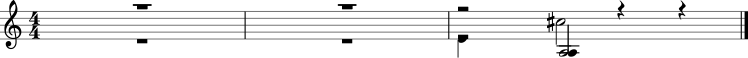

In [268]:
chordless = removeChords(song)
chordless.flat.getElementsByOffset(10, mustBeginInSpan=False, classList=['Note']).show()

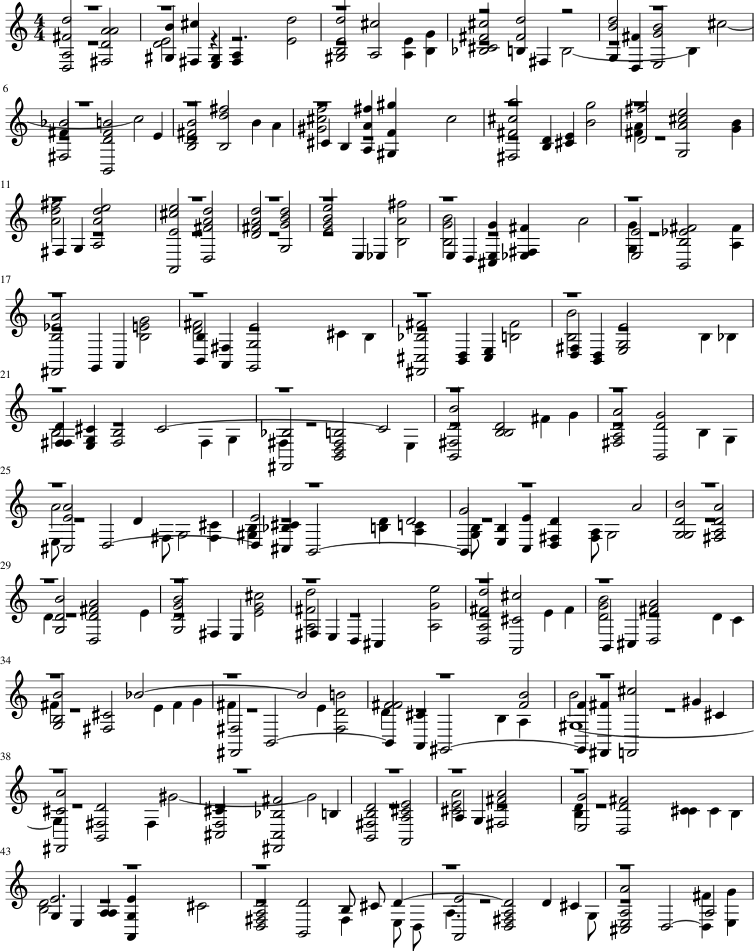

In [251]:
song.show()

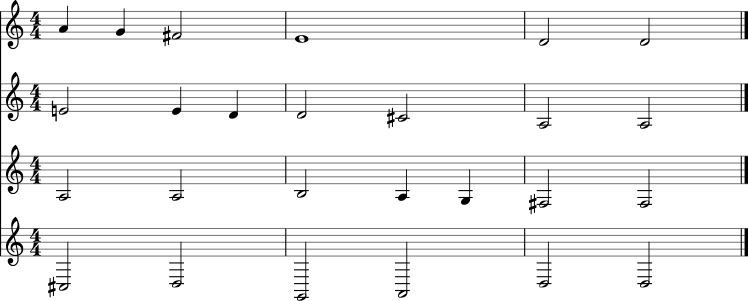

In [248]:
sepVoices.measures(50,100).show()

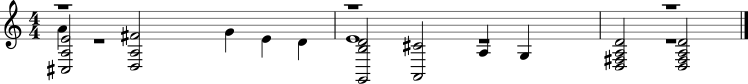

In [244]:
song.measures(50,100).show()

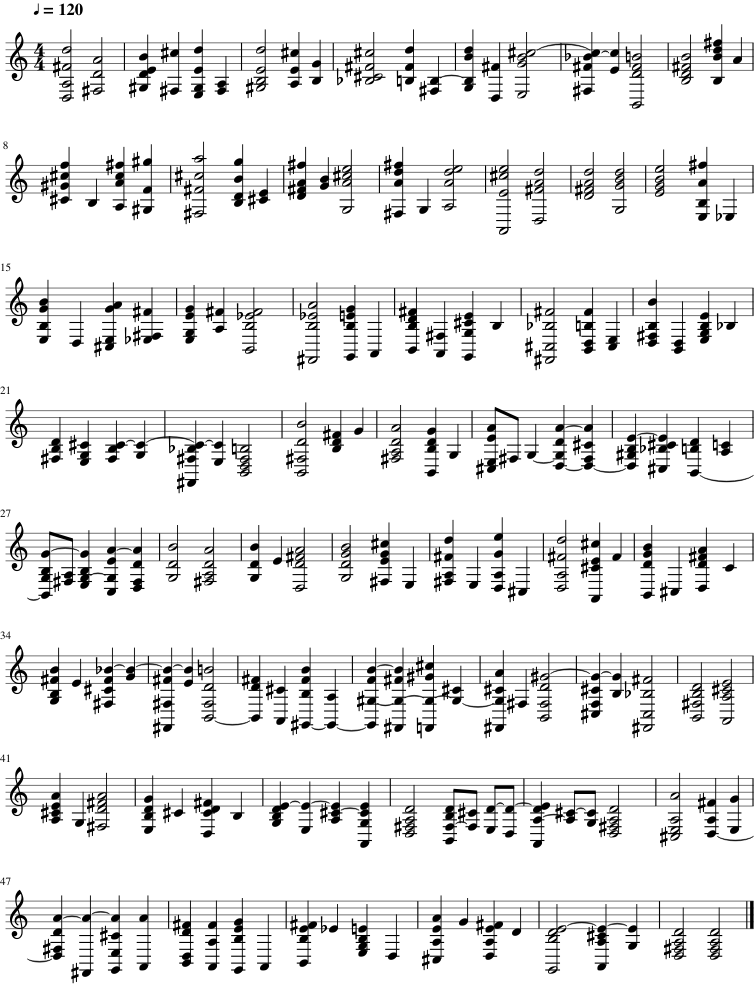

In [233]:


removeChords(song).chordify().show()